In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

plt.rcParams["figure.figsize"] = (15,5)

In [ ]:
#Read Metrics file for the team
BASE_PATH = os.getcwd()+'/'
INPUT_PATH = BASE_PATH
print(INPUT_PATH)

team = "team_1"
df_metrics_team1 = pd.read_csv(INPUT_PATH+f'winning-submissions/{team}/metrics.csv')

team = "team_2"
df_metrics_team2 = pd.read_csv(INPUT_PATH+f'winning-submissions/{team}/metrics.csv')

team = "team_3"
df_metrics_team3 = pd.read_csv(INPUT_PATH+f'winning-submissions/{team}/metrics.csv')


In [3]:
df_metrics_team1.head(3)

,id,dice_score,iou_score,hd_score,hd95_score,filename,tissue_name
0,3417,0.818191,0.692320,157.581725,155.066639,D116-RML-BPS-2-2_0_0_22_lung,lung
1,9077,0.651993,0.483672,180.693110,246.861231,D071-RLL-17B5-2_1323_1323_27_lung,lung
2,474,0.704360,0.543639,517.000967,499.022386,D356-RLL-12A3-2_0_0_16_lung,lung


# Violin plot for overall dice, categorized by teams

In [4]:
print(df_metrics_team1["dice_score"].mean())
print(df_metrics_team2["dice_score"].mean())
print(df_metrics_team3["dice_score"].mean())

0.8356159833475378
0.8339292939248892
0.8326609412139847


In [5]:
print(df_metrics_team1["iou_score"].mean())
print(df_metrics_team2["iou_score"].mean())
print(df_metrics_team3["iou_score"].mean())

0.7384615995430411
0.7362468557228992
0.7333478375569404


In [6]:
print(df_metrics_team1["hd_score"].mean())
print(df_metrics_team2["hd_score"].mean())
print(df_metrics_team3["hd_score"].mean())

201.99175323853962
261.016577773816
268.1459310778021


In [7]:
print(df_metrics_team1["hd95_score"].mean())
print(df_metrics_team2["hd95_score"].mean())
print(df_metrics_team3["hd95_score"].mean())

380.92824735591137
392.336002327034
406.3626494362451


In [8]:
df_metrics_team1["team"] = "Team 1"
df_metrics_team2["team"] = "Team 2"
df_metrics_team3["team"] = "Team 3"
df_metrics_team3.head()

,id,dice_score,iou_score,hd_score,hd95_score,filename,tissue_name,team
0,3417,0.796006,0.661138,311.852529,299.903047,D116-RML-BPS-2-2_0_0_22_lung,lung,Team 3
1,9077,0.757720,0.609943,157.543645,178.041250,D071-RLL-17B5-2_1323_1323_27_lung,lung,Team 3
2,474,0.655108,0.487108,210.800854,208.958512,D356-RLL-12A3-2_0_0_16_lung,lung,Team 3
3,22423,0.793068,0.657094,606.469290,583.745332,D231-RLL-13B4-2_0_0_32_lung,lung,Team 3
4,16724,0.594874,0.423360,450.165525,430.694517,D239-RLL-23C4-2_0_0_45_lung,lung,Team 3


In [9]:
merged_metrics = pd.concat([df_metrics_team1, df_metrics_team2, df_metrics_team3], ignore_index=True)
merged_metrics.head()

,id,dice_score,iou_score,hd_score,hd95_score,filename,tissue_name,team
0,3417,0.818191,0.692320,157.581725,155.066639,D116-RML-BPS-2-2_0_0_22_lung,lung,Team 1
1,9077,0.651993,0.483672,180.693110,246.861231,D071-RLL-17B5-2_1323_1323_27_lung,lung,Team 1
2,474,0.704360,0.543639,517.000967,499.022386,D356-RLL-12A3-2_0_0_16_lung,lung,Team 1
3,22423,0.749926,0.599905,600.166644,576.731933,D231-RLL-13B4-2_0_0_32_lung,lung,Team 1
4,16724,0.547021,0.376482,458.488822,441.094526,D239-RLL-23C4-2_0_0_45_lung,lung,Team 1


In [10]:
merged_metrics.tail()

,id,dice_score,iou_score,hd_score,hd95_score,filename,tissue_name,team
712,6501,0.865920,0.763545,126.463433,839.884701,A002-C-119_patch_0_0_largeintestine,largeintestine,Team 3
713,24616,0.889780,0.801445,203.194488,1002.324097,A001-C-202_patch_1_0_largeintestine,largeintestine,Team 3
714,31845,0.909717,0.834386,96.400207,639.556523,A001-C-023_patch_1_0_largeintestine,largeintestine,Team 3
715,20647,0.837224,0.720022,324.013889,673.339805,A001-C-224_patch_1_0_largeintestine,largeintestine,Team 3
716,27336,0.831298,0.711300,436.743632,724.167369,JP_Desc_2_patch_1_0_largeintestine,largeintestine,Team 3


In [11]:
merged_metrics_counts = merged_metrics['team'].value_counts()
print('Total', merged_metrics_counts.sum())
merged_metrics_counts

Total 717


Team 1    239
Team 2    239
Team 3    239
Name: team, dtype: int64

In [12]:
merged_metrics_sorted = merged_metrics.sort_values("tissue_name")
merged_metrics_sorted

,id,dice_score,iou_score,hd_score,hd95_score,filename,tissue_name,team
358,25269,0.981603,0.963870,31.000000,229.082437,VAN0035-LK-10-11-PAS_FFPE_patch_8000_8000_33_k...,kidney,Team 2
106,23455,0.976479,0.954039,29.832868,584.863585,VAN0029-RK-7-11-PAS_FFPE_patch_28000_18000_92_...,kidney,Team 1
107,6518,0.954079,0.912191,5.830952,344.518119,VAN0009-LK-108-11-PAS_FFPE_patch_12000_8000_52...,kidney,Team 1
108,7428,0.960337,0.923700,10.770330,456.320756,VAN0013-LK-205-11-PAS_FFPE_patch_16000_22000_7...,kidney,Team 1
109,7252,0.978293,0.957508,48.000000,207.600000,VAN0005-RK-8-11-PAS_FFPE_patch_38000_32000_142...,kidney,Team 1
...,...,...,...,...,...,...,...,...
144,28415,0.852460,0.742859,429.588175,633.326612,179753_0_0_85_spleen,spleen,Team 1
145,10673,0.901539,0.820729,114.551299,737.908903,178798_patch_8_0_spleen,spleen,Team 1
146,1478,0.866158,0.763915,322.876137,312.483200,179751_0_0_6_spleen,spleen,Team 1
136,8819,0.813667,0.685868,18.973666,498.191788,179754_0_0_77_spleen,spleen,Team 1


In [13]:
merged_metrics_sorted['tissue_name'] = merged_metrics_sorted['tissue_name'].apply(lambda x: str(x.replace("kidney", "Kidney")))
merged_metrics_sorted['tissue_name'] = merged_metrics_sorted['tissue_name'].apply(lambda x: str(x.replace("largeintestine", "Large Intestine")))
merged_metrics_sorted['tissue_name'] = merged_metrics_sorted['tissue_name'].apply(lambda x: str(x.replace("spleen", "Spleen")))
merged_metrics_sorted['tissue_name'] = merged_metrics_sorted['tissue_name'].apply(lambda x: str(x.replace("lung", "Lung")))
merged_metrics_sorted['tissue_name'] = merged_metrics_sorted['tissue_name'].apply(lambda x: str(x.replace("prostate", "Prostate")))

merged_metrics_sorted = merged_metrics_sorted.rename(columns={"tissue_name": "Organ"})
merged_metrics_sorted = merged_metrics_sorted.rename(columns={"team": "Team"})
merged_metrics_sorted = merged_metrics_sorted.rename(columns={"dice_score": "Dice Score"})
merged_metrics_sorted = merged_metrics_sorted.rename(columns={"iou_score": "IOU Score"})

# Dice Plots

<AxesSubplot:xlabel='Organ', ylabel='Dice Score'>

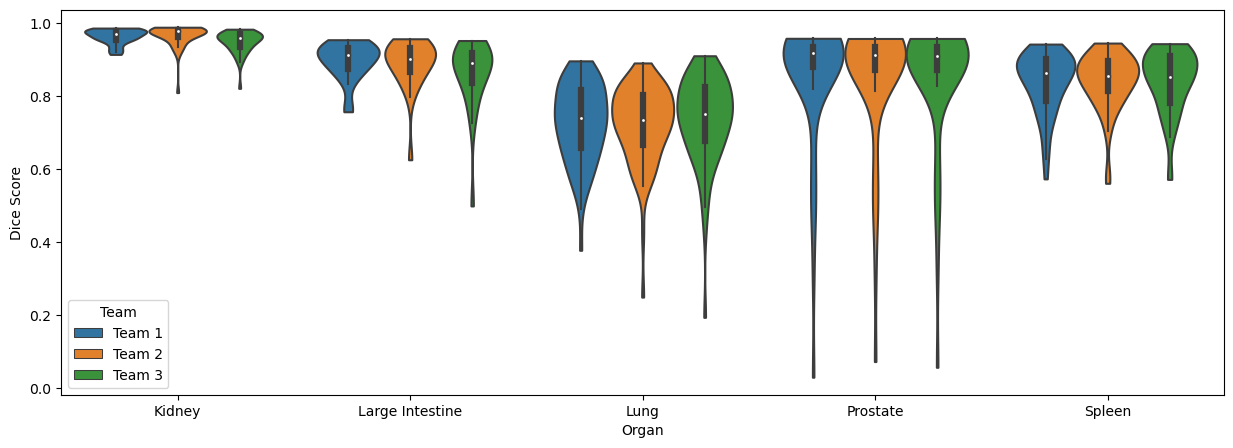

In [14]:
sns.violinplot(data=merged_metrics_sorted, x="Organ", y="Dice Score", scale="area", cut=0, inner="box", hue="Team", hue_order=["Team 1", "Team 2", "Team 3"])

<AxesSubplot:xlabel='Team', ylabel='Dice Score'>

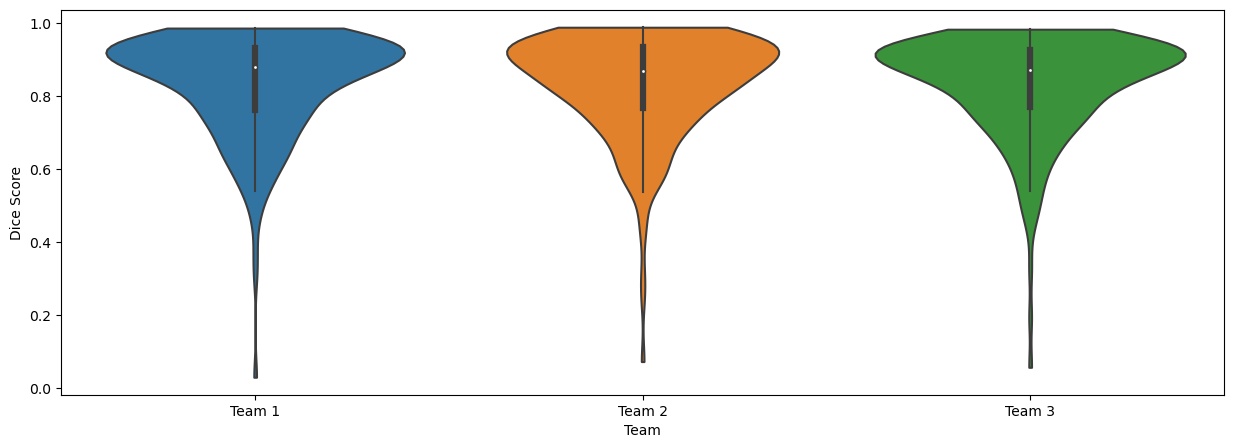

In [15]:
sns.violinplot(data=merged_metrics_sorted, x="Team", y="Dice Score", scale="area", cut=0, inner="box", order=["Team 1", "Team 2", "Team 3"])

# IOU Plots

<AxesSubplot:xlabel='Organ', ylabel='IOU Score'>

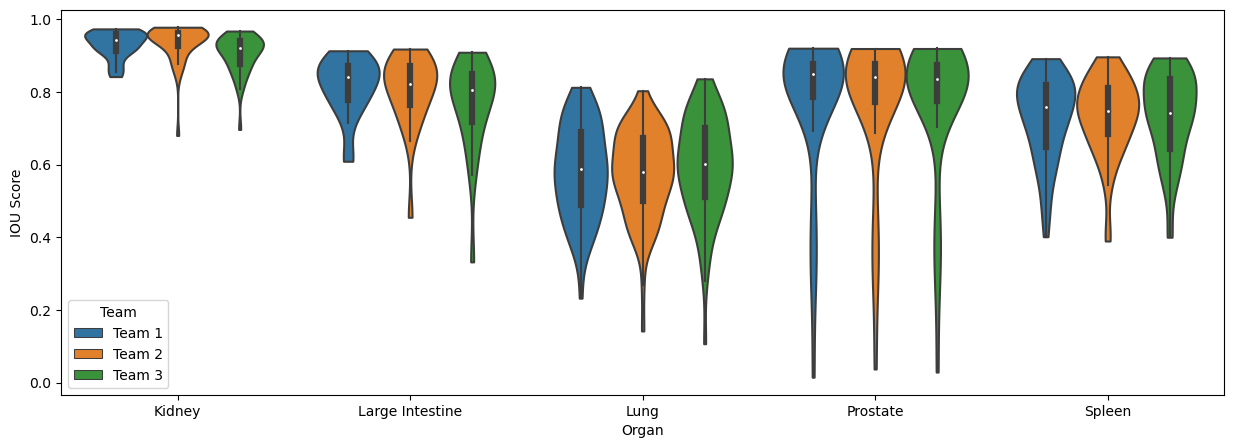

In [16]:
sns.violinplot(data=merged_metrics_sorted, x="Organ", y="IOU Score", scale="area", cut=0, inner="box", hue="Team", hue_order=["Team 1", "Team 2", "Team 3"])

<AxesSubplot:xlabel='Team', ylabel='IOU Score'>

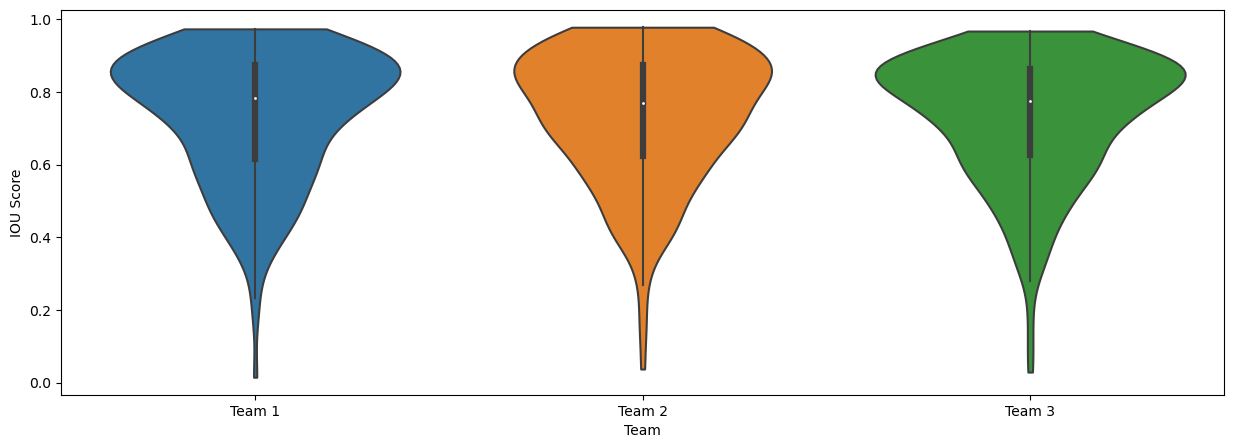

In [17]:
sns.violinplot(data=merged_metrics_sorted, x="Team", y="IOU Score", scale="area", cut=0, inner="box", order=["Team 1", "Team 2", "Team 3"])

# Dice v IOU split violin

In [18]:
merged_score = merged_metrics_sorted.melt(id_vars=['id', 'filename', 'Team', 'Organ'], value_vars=['IOU Score', 'Dice Score'],
                    var_name='Metric', value_name='Score')

# Add 'metric' column based on the source of the value
merged_score['Metric'] = merged_score['Metric'].map({'IOU Score': 'IOU Score', 'Dice Score': 'Dice Score'})
# Display the merged dataframe
merged_score.head()

,id,filename,Team,Organ,Metric,Score
0,25269,VAN0035-LK-10-11-PAS_FFPE_patch_8000_8000_33_k...,Team 2,Kidney,IOU Score,0.963870
1,23455,VAN0029-RK-7-11-PAS_FFPE_patch_28000_18000_92_...,Team 1,Kidney,IOU Score,0.954039
2,6518,VAN0009-LK-108-11-PAS_FFPE_patch_12000_8000_52...,Team 1,Kidney,IOU Score,0.912191
3,7428,VAN0013-LK-205-11-PAS_FFPE_patch_16000_22000_7...,Team 1,Kidney,IOU Score,0.923700
4,7252,VAN0005-RK-8-11-PAS_FFPE_patch_38000_32000_142...,Team 1,Kidney,IOU Score,0.957508


<AxesSubplot:xlabel='Team', ylabel='Score'>

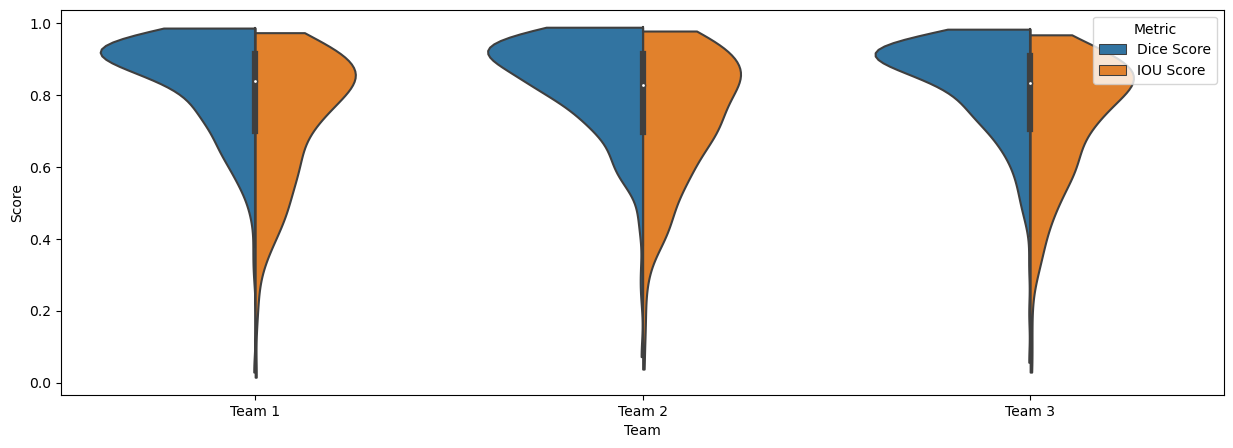

In [19]:
sns.violinplot(data=merged_score, x="Team", y="Score", scale="area", cut=0, inner="box", hue="Metric", hue_order=["Dice Score", "IOU Score"], split=True, order=["Team 1", "Team 2", "Team 3"])

In [20]:
merged_score_team1 = merged_score[merged_score["Team"] == "Team 1"]
merged_score_team2 = merged_score[merged_score["Team"] == "Team 2"]
merged_score_team3 = merged_score[merged_score["Team"] == "Team 3"]

<AxesSubplot:xlabel='Organ', ylabel='Score'>

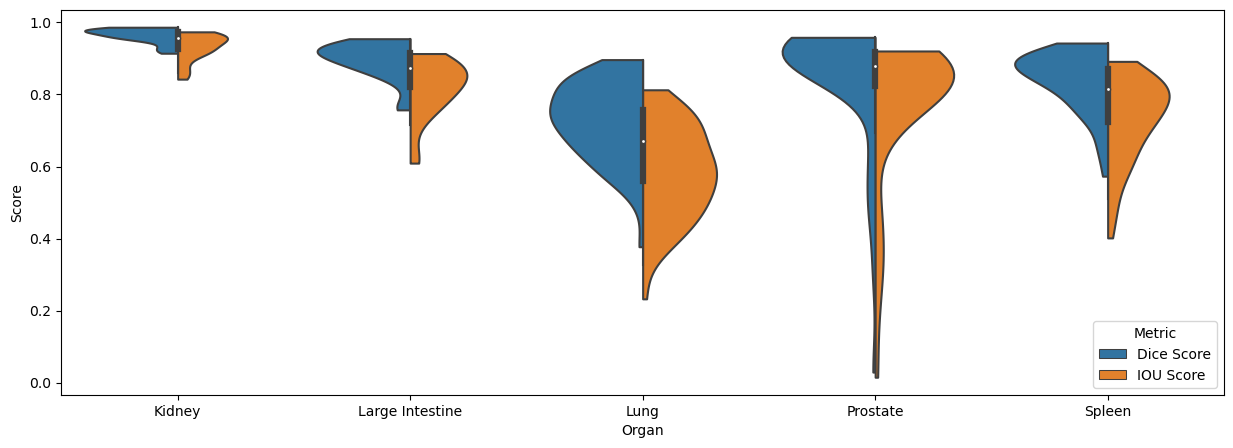

In [21]:
sns.violinplot(data=merged_score_team1, x="Organ", y="Score", scale="area", cut=0, inner="box", hue="Metric", hue_order=["Dice Score", "IOU Score"], split=True)

<AxesSubplot:xlabel='Organ', ylabel='Score'>

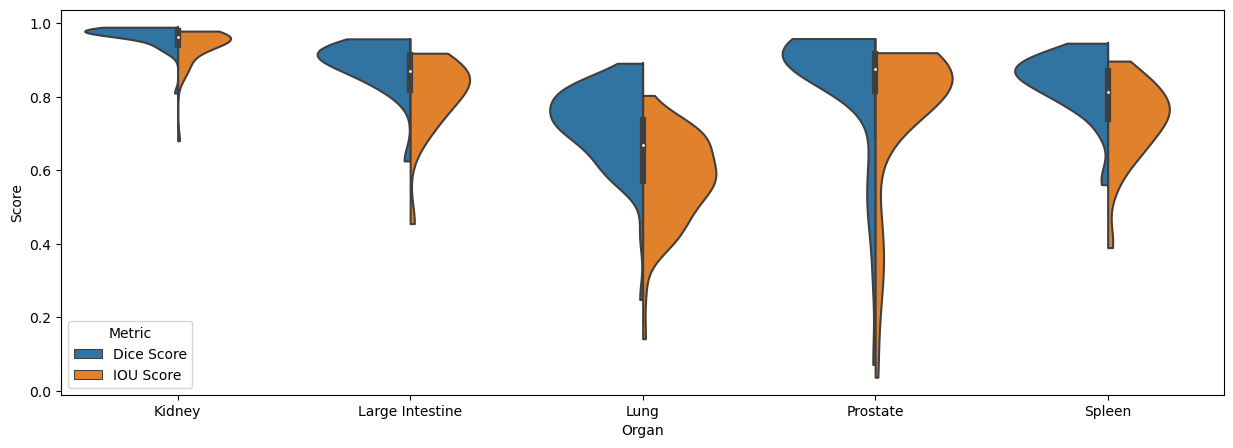

In [22]:
sns.violinplot(data=merged_score_team2, x="Organ", y="Score", scale="area", cut=0, inner="box", hue="Metric", hue_order=["Dice Score", "IOU Score"], split=True)

<AxesSubplot:xlabel='Organ', ylabel='Score'>

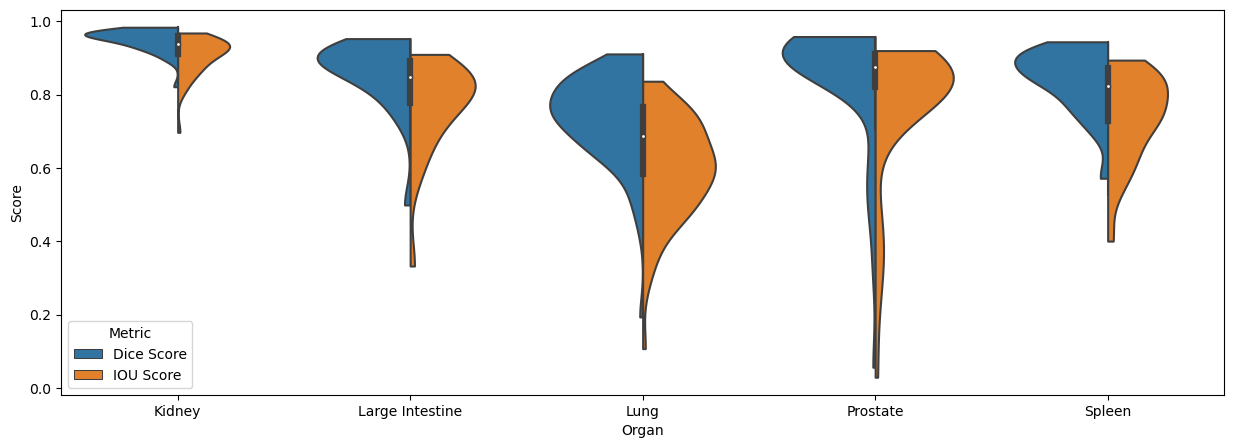

In [23]:
sns.violinplot(data=merged_score_team3, x="Organ", y="Score", scale="area", cut=0, inner="box", hue="Metric", hue_order=["Dice Score", "IOU Score"], split=True)

<AxesSubplot:xlabel='Organ', ylabel='Score'>

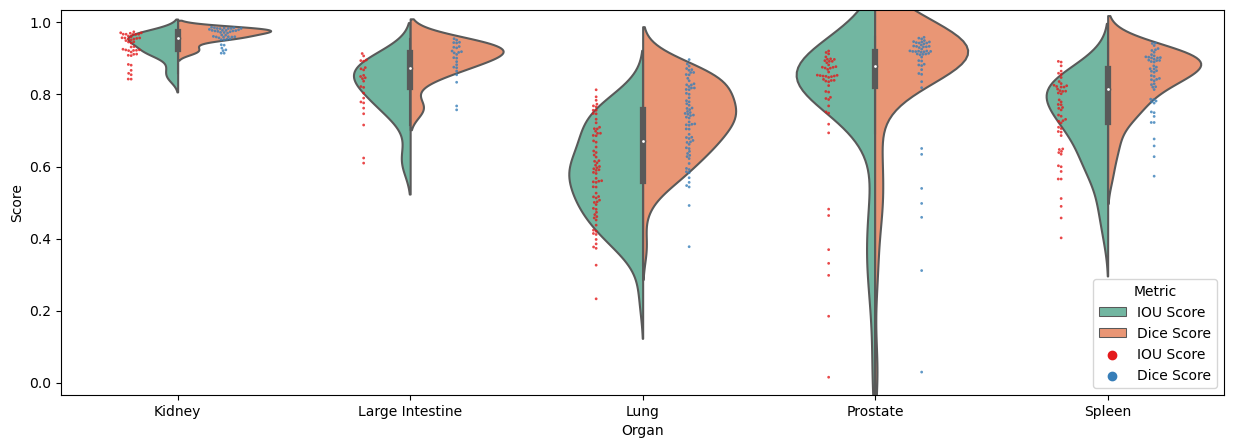

In [24]:
sns.violinplot(data=merged_score_team1, x='Organ', y='Score', hue='Metric', split=True, palette='Set2')

sns.swarmplot(data=merged_score_team1, x='Organ', y='Score', hue='Metric', dodge=True, alpha=.8, s=2, palette='Set1')



<AxesSubplot:xlabel='Organ', ylabel='Score'>

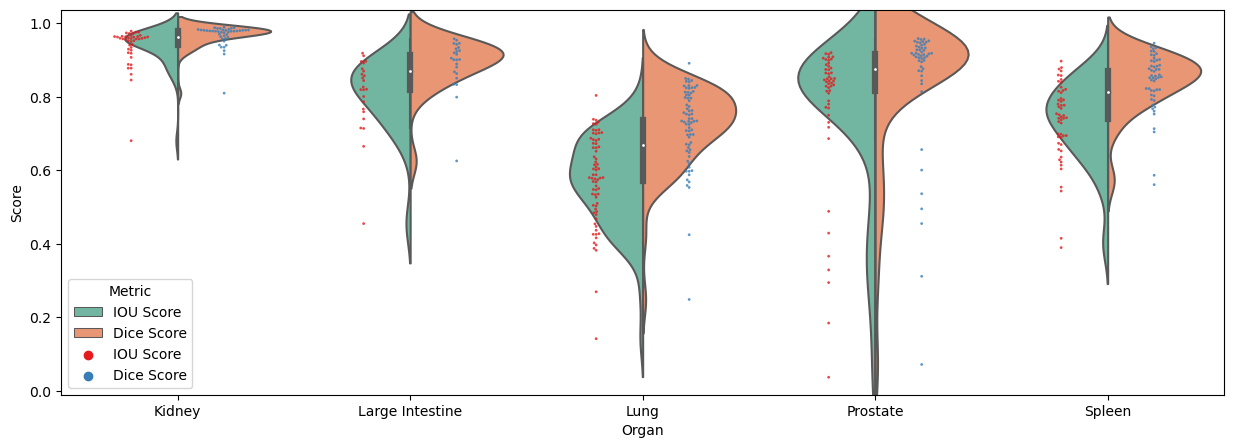

In [25]:
sns.violinplot(data=merged_score_team2, x='Organ', y='Score', hue='Metric', split=True, palette='Set2')

sns.swarmplot(data=merged_score_team2, x='Organ', y='Score', hue='Metric', dodge=True, alpha=.8, s=2, palette='Set1')

<AxesSubplot:xlabel='Organ', ylabel='Score'>

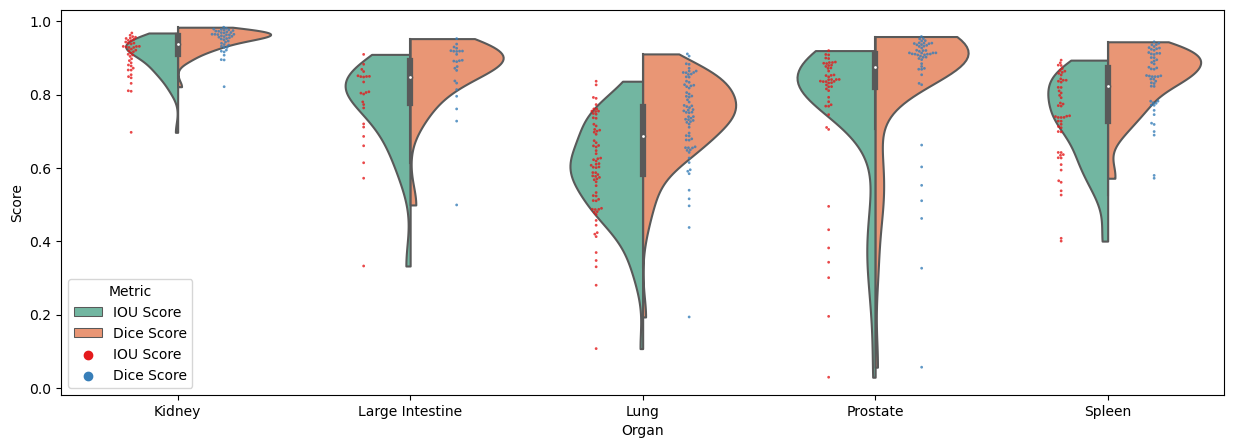

In [26]:
sns.violinplot(data=merged_score_team3, x='Organ', y='Score', hue='Metric', split=True, palette='Set2', cut=0)

sns.swarmplot(data=merged_score_team3, x='Organ', y='Score', hue='Metric', dodge=True, alpha=.8, s=2, palette='Set1')

# Final Violin Plots

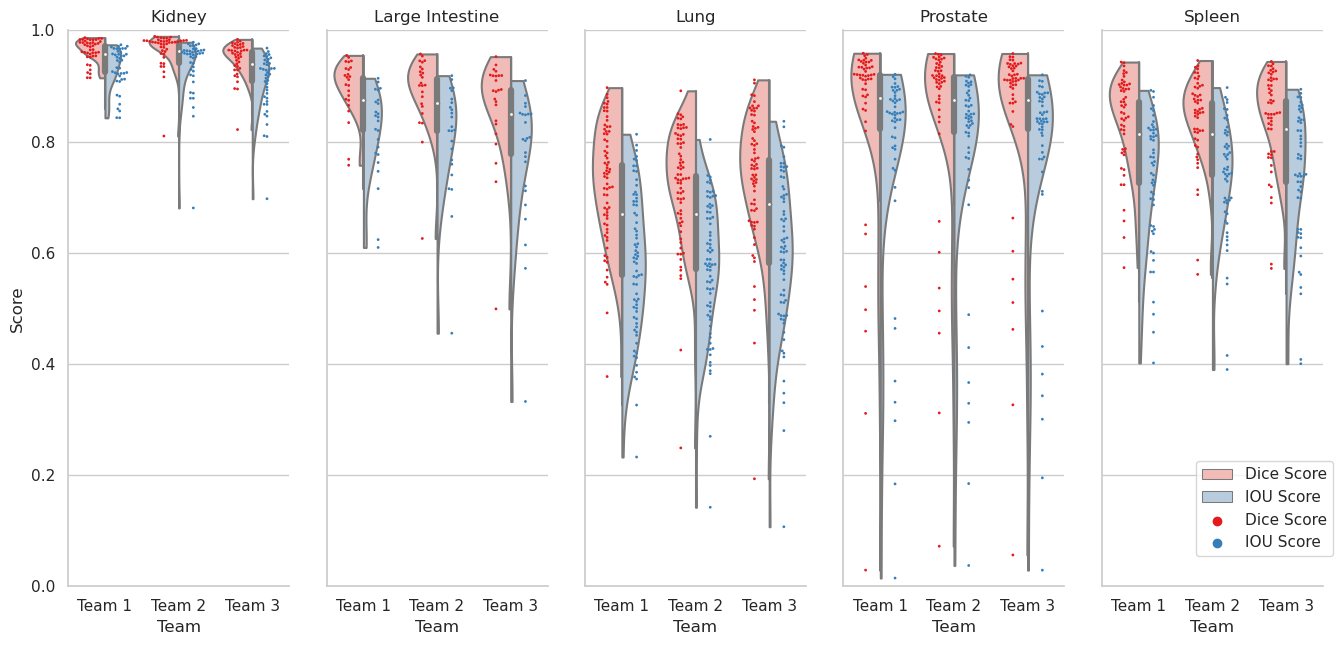

In [36]:
sns.set(style="whitegrid")
custom_palette1 = 'Set1'
custom_palette2 = 'Pastel1'
# plt.figure()
g = sns.catplot(x='Team',y='Score', col = 'Organ', data=merged_score,
                kind='violin', aspect=0.4, height=7, palette=custom_palette2, hue="Metric", split=True, order=["Team 1", "Team 2", "Team 3"], hue_order=["Dice Score", "IOU Score"], cut=0, scale="area", inner="box", legend=False)
(g.set_axis_labels("Organ", "Score")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))

# g = g.facet_grid(row='Metric', sharey=False)

# Add the swarm plot on top of each violin subplot
g = g.map_dataframe(sns.swarmplot, 'Team', 'Score', hue='Metric', dodge=True, size=2, alpha=1.0, palette=custom_palette1, hue_order=["Dice Score", "IOU Score"], order=["Team 1", "Team 2", "Team 3"])

# Adjust the legend position
plt.legend(loc='lower right', bbox_to_anchor=(1.08, 0.04), ncol=1)
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":25,"axes.labelsize":25})


plt.tight_layout()
plt.savefig('violin_per_team.svg', dpi=1200, format='svg')
plt.savefig('violin_per_team.png', dpi=1200, format='png')

# Show the plot
plt.show()

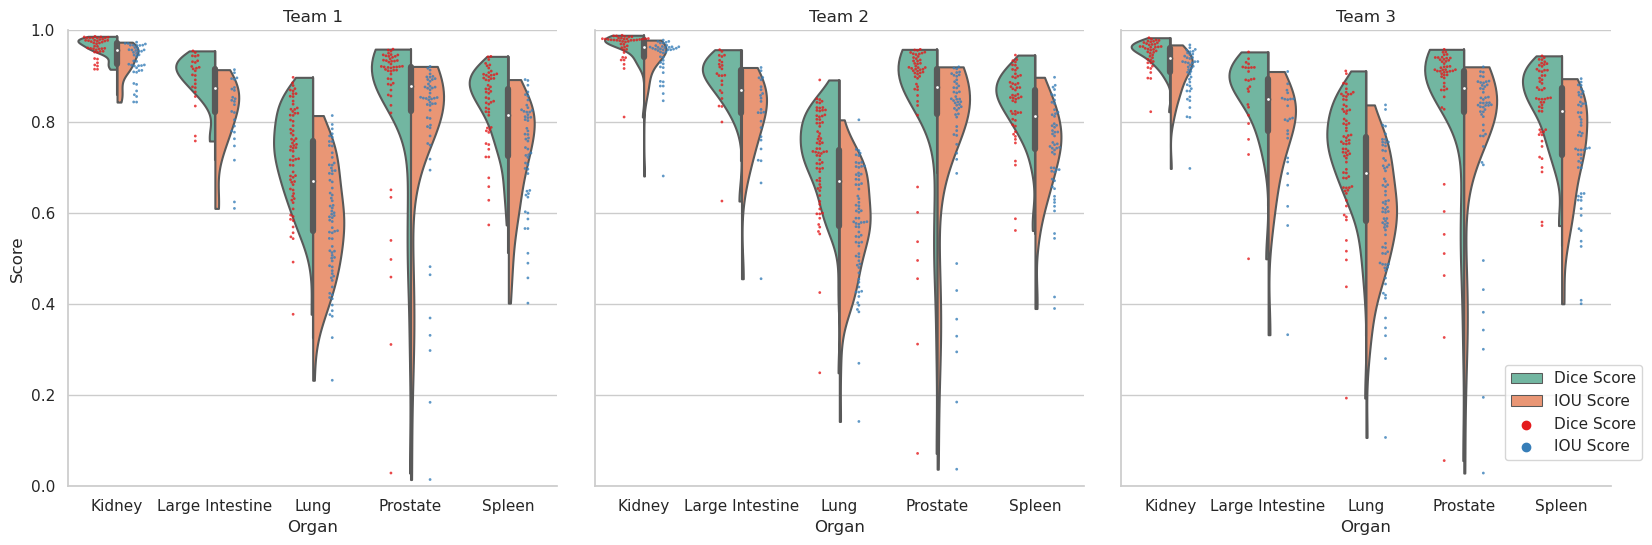

In [28]:
sns.set(style="whitegrid")
# plt.figure()
g = sns.catplot(x='Organ',y='Score', col = 'Team', data=merged_score,
                kind='violin', aspect=0.95, height=6, palette='Set2', hue="Metric", split=True, hue_order=["Dice Score", "IOU Score"], order=["Kidney", "Large Intestine", "Lung", "Prostate", "Spleen"], col_order=["Team 1", "Team 2", "Team 3"], cut=0, scale="area", inner="box", legend=False)
(g.set_axis_labels("Organ", "Score")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))

# g = g.facet_grid(row='Metric', sharey=False)

# Add the swarm plot on top of each violin subplot
g = g.map_dataframe(sns.swarmplot, 'Organ', 'Score', hue='Metric', dodge=True, size=2, alpha=0.8, palette='Set1', hue_order=["Dice Score", "IOU Score"], order=["Kidney", "Large Intestine", "Lung", "Prostate", "Spleen"])

# Adjust the legend position
plt.legend(loc='lower right', bbox_to_anchor=(1.08, 0.04), ncol=1)
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":25,"axes.labelsize":25})


plt.tight_layout()
plt.savefig('violin_per_organ.svg', dpi=1200, format='svg')
plt.savefig('violin_per_organ.png', dpi=1200, format='png')

# Show the plot
plt.show()


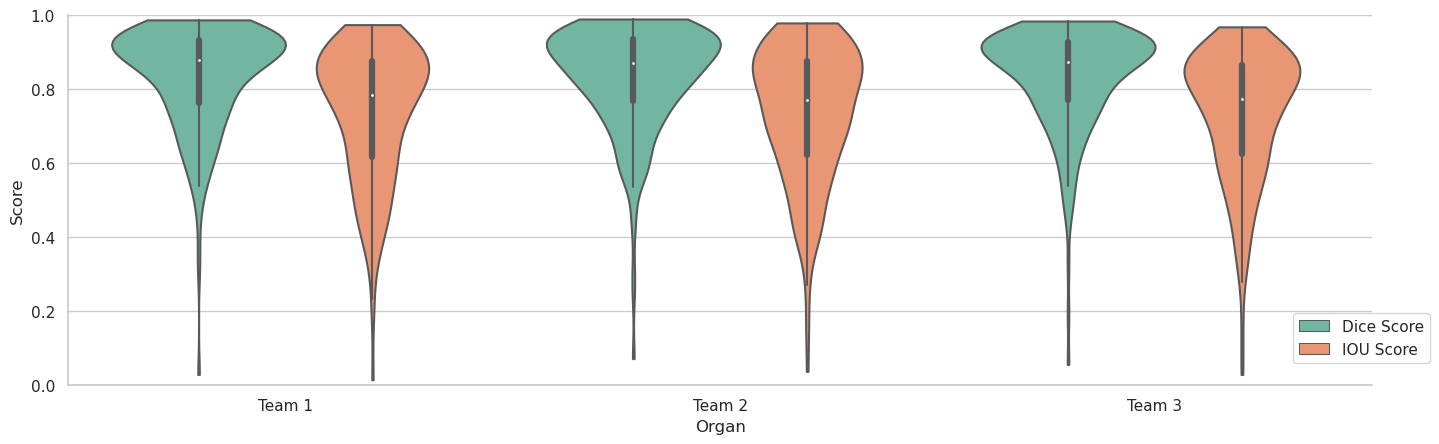

In [29]:
sns.set(style="whitegrid")
# plt.figure()
g = sns.catplot(x='Team',y='Score', data=merged_score,
                kind='violin', aspect=3, height=5, palette='Set2', hue="Metric", split=False, hue_order=["Dice Score", "IOU Score"], cut=0, scale="area", inner="box", legend=False, order=["Team 1", "Team 2", "Team 3"])
(g.set_axis_labels("Organ", "Score")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))

# g = g.facet_grid(row='Metric', sharey=False)

# Add the swarm plot on top of each violin subplot
# g = g.map_dataframe(sns.swarmplot, 'Organ', 'Score', hue='Metric', dodge=True, size=2, alpha=0.8, palette='Set1', hue_order=["Dice Score", "IOU Score"])

# Adjust the legend position
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0.04), ncol=1)
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":25,"axes.labelsize":25})


plt.tight_layout()
plt.savefig('violin_overall.svg', dpi=1200, format='svg')
plt.savefig('violin_overall.png', dpi=1200, format='png')

# Show the plot
plt.show()